<a href="https://colab.research.google.com/github/MatteusStranger/genetic_algorithm_mc906/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MC906A/MO416A - Introducition to Artificial Intelligence
## Institute of Computing - Unicamp

## Project 2 for MC906 disciplina

### Authors

- Matteus Vargas (ra: 262885)
- Christian Maekawa (ra: 231867)
- Stéfani Fernandes (ra: 147939)
- Maisa Silva (ra: 181831)
- Giovane de Morais (ra: 192683)

In [1]:
import sys
import numpy as np
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !git clone https://github.com/MatteusStranger/genetic_algorithm_mc906.git
  %cd /content/genetic_algorithm_mc906/
  !pip install -e extra_lib/
  #sys.path.append('/content/genetic_algorithm_mc906/')
import extra_lib.metamodel as hospitalModel


Cloning into 'genetic_algorithm_mc906'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 207 (delta 91), reused 181 (delta 71), pack-reused 0
Receiving objects: 100% (207/207), 445.66 KiB | 1.53 MiB/s, done.
Resolving deltas: 100% (91/91), done.
/content/genetic_algorithm_mc906
Obtaining file:///content/genetic_algorithm_mc906/extra_lib
  Running setup.py develop for extra-lib


## The problem addressed

Find the number of employees needed to maximize the number of patients served.

## The evolutionary model adopted
There are two evolutionary model adopted... 

## Implementation specifics and restrictions

|Represetation | Decision variables                          | type    | Lower bound      | Upper bound    |
|:-------------|:-------------------------------------------:|:-------:|:----------------:|---------------:|
|x1            | Number of receptionists                     | Integer |        1         |       3        |
|x2            | Number of doctors                           | Integer |        1         |       4        |
|x3            | Number of laboratory technicians            | Integer |        1         |       5        |
|x4            | Number of nurses in the treatment room      | Integer |        1         |       6        |
|x5            | Number of nurses in the emergency room      | Integer |        1         |       12       |

### Cromossomo representation 

## Variations on parameters
- Population x y z
- Strategy k l m to make crossing over
- strategy n o p to make mutation

Need to fill

- population size
- stop criteria
- selection technique
- crossover technique
- mutation technique
- replacement method
- mutation rate
- crossover rate



## Fitness function adopted
- Maximaze metamodel math equation generated by genetic programming $y1 = 1.113x_{2} + 0.701x_{2}x_{3} + 0.207x_{2}x_{5} + 0.021x_{1}x_{5} - 0.435x_{2}^{2} - 0.013x_{2}x_{5}^{2} - 0.092 x_{2}x_{3}^{2}$.

- Maximaze artificial netweork neural metamodel.



In [2]:
y1 = lambda x1,x2,x3,x4,x5: 1.113*x2 + 0.701*x2*x3 + 0.207*x2*x5 + 0.021*x1*x5 - \
                            0.435*x2**2 - 0.013*x2*x5**2 -0.092*x2*x3**2
mm = hospitalModel.metamodel()
mm.cuda_status()
mm.fit()

Are you using GPU? True
Tesla K80
GPU Power(max,min)(3, 7)
Epoch 1000/epochs, Train Loss: 0.1353 Test Loss: 0.1075


Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

## About dataset
It is about simulated hospital client server
### This data was simulated using literature reviews 
Trying to visualize correlations. We can't see correlation between variables

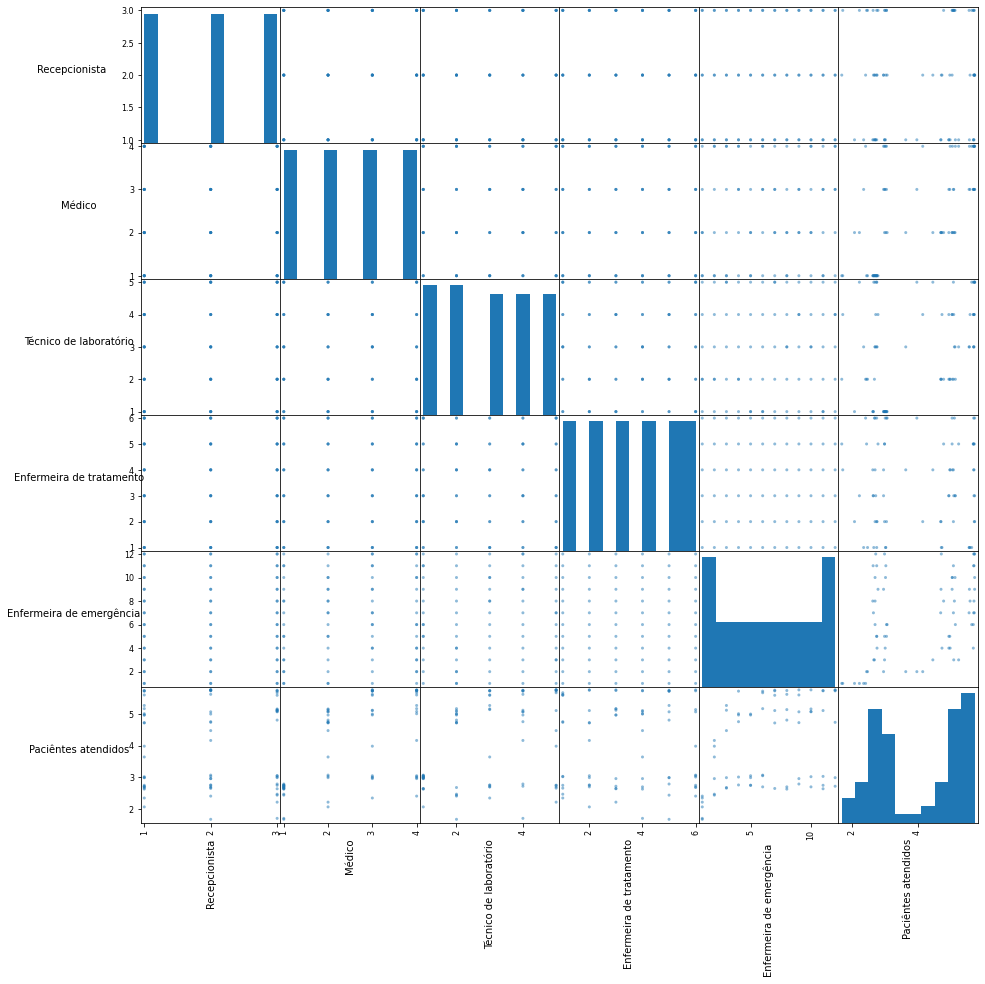

In [7]:
mm.plot_correlations()

Trying to visualize distribution. We can see some distributions are balanced others, not.

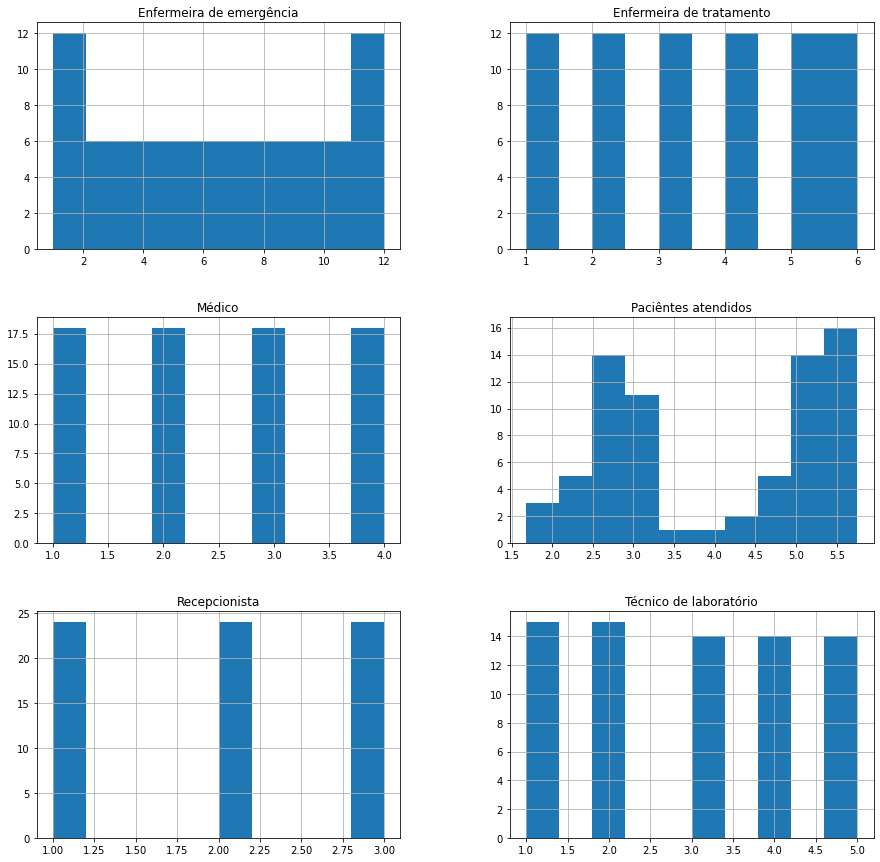

In [4]:
mm.plot_distributions()

ANN with 5 neuron and using sigmoid as activation function. This dataset converge our metamodel.

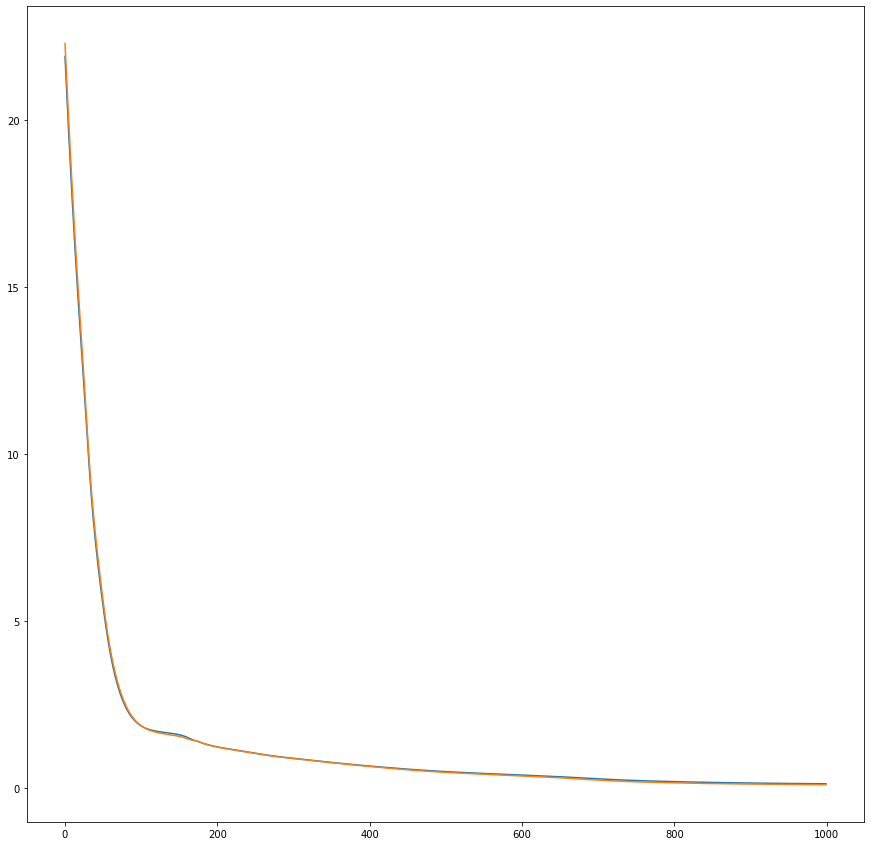

In [5]:
mm.train_performance()

## Usage

In [6]:
print("Eureqa Software (Using Genetic programming)") ## Useful to return math equation
print(y1(3,4,4,1,9))
print("ANN with 5 neuron and using sigmoid as activation function d")
s=mm.predict([3,4,4,1,9])[0][0]
print(s)
print("Real answer from simulation")
print("5.76") ## Get from literature

Eureqa Software (Using Genetic programming)
6.626999999999997
ANN with 5 neuron and using sigmoid as activation function d
tensor([[3., 4., 4., 1., 9.]])
5.8203936
Real answer from simulation
5.76


Error between genetic programming and result is bigger than ANN. But genetic programming return a math equation. ANN we can't return math equation. ANN return weight and we can see what weight is more relevant. 

-------------------
## AG to maximize function
Code made from team to optimize eureqa equantion and ANN.

* Goal is found input to maximize our model. 